In [1]:
pip install matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Load the CSV file
df = pd.read_csv('disney_plus_titles.csv')

In [5]:
# Data Cleaning
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [6]:
# Handling missing values
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'}, inplace=True)

In [7]:

# Feature Engineering
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

In [8]:
# Text Processing (example for description column)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_description'] = df['description'].apply(preprocess_text)

In [9]:
# Encoding categorical variables (example for rating column)
df = pd.get_dummies(df, columns=['rating'], prefix='rating')

In [10]:
# Save the preprocessed data
df.to_csv('disney_plus_titles_cleaned.csv', index=False)


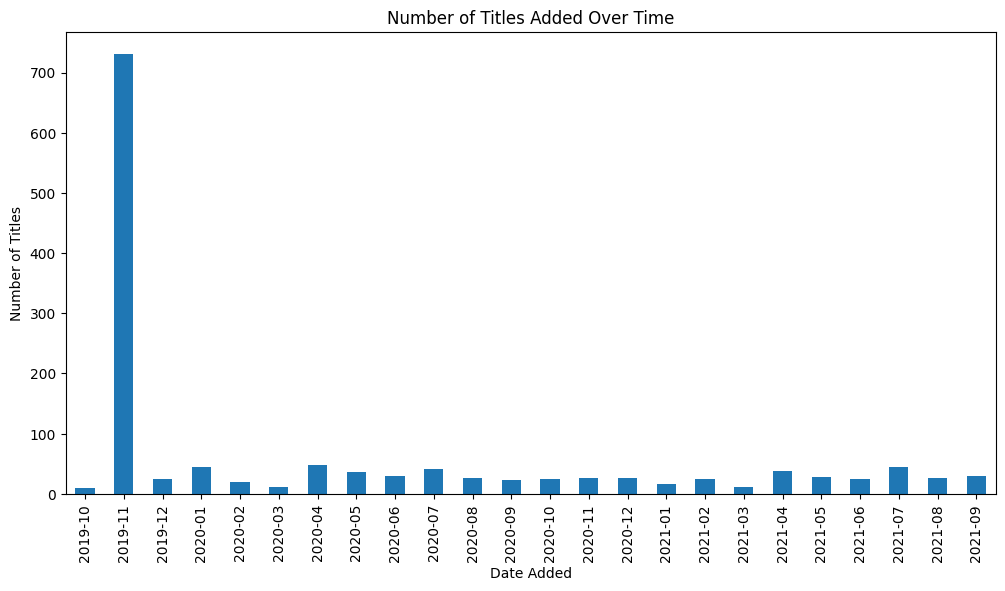

In [11]:
# Visualization

# 1. Number of Titles Added Over Time
plt.figure(figsize=(12, 6))
df['date_added'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Titles Added Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-108c5a25c4ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


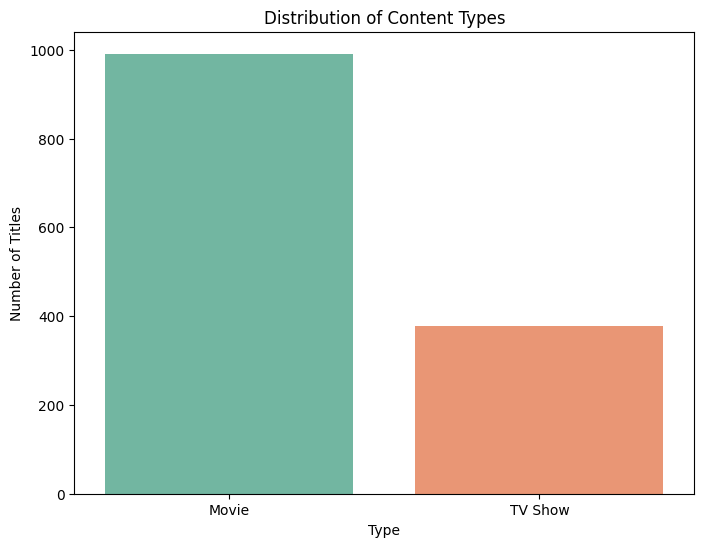

In [12]:
# 2. Distribution of Content Types (Movies vs. TV Shows)
plt.figure(figsize=(8, 6))
type_counts = df['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

<ipython-input-13-399317107f64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')


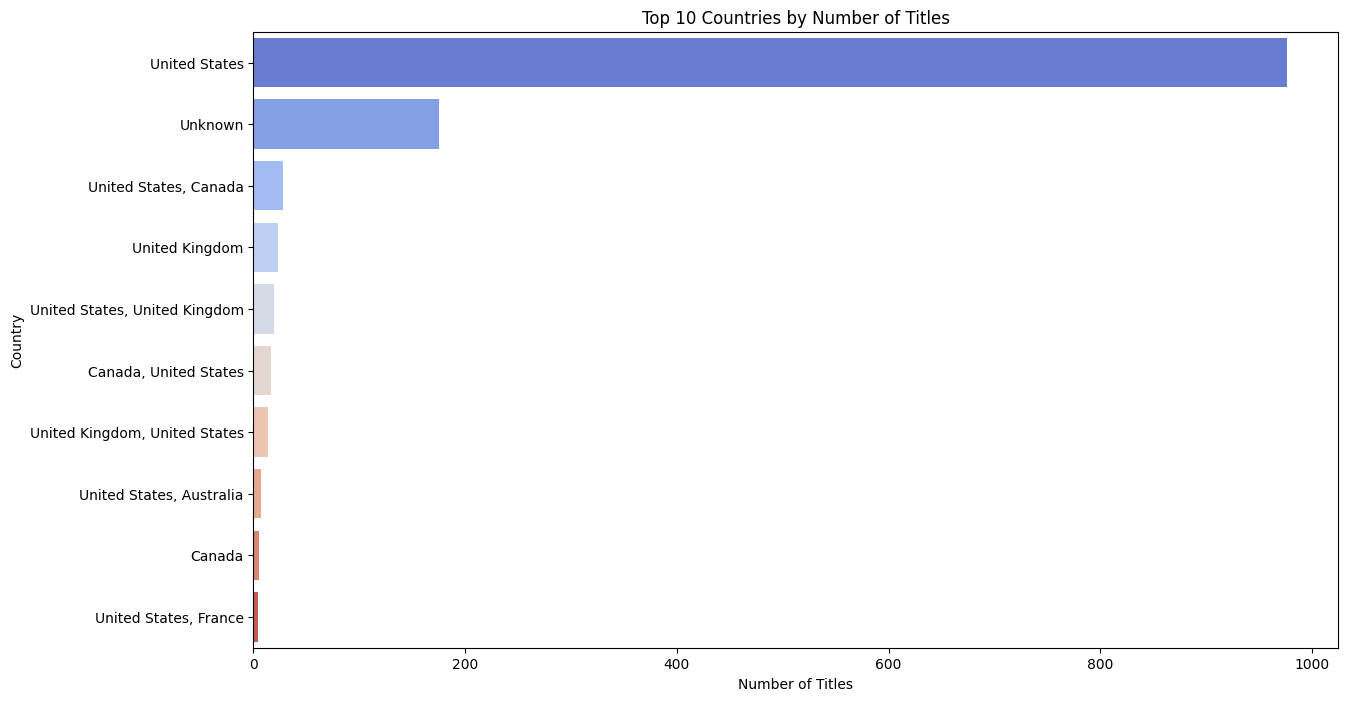

  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                     Unknown   
4                     Unknown   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                Unknown   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

In [13]:
# 3. Top 10 Countries by Number of Titles
plt.figure(figsize=(14, 8))
country_counts = df['country'].value_counts().nlargest(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

print(df.head())